##**David Alejandro Vásquez Franco**

##**CC 1000921301**

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [40]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7de0c83679b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7de0c8367b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de0c83652e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7de0c83640b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de0c8364a10>],
 'means': []}

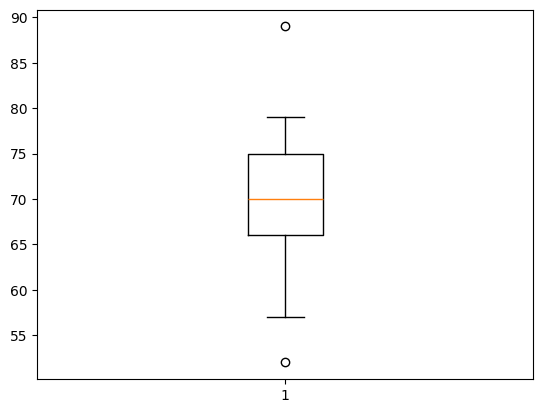

In [41]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






# **Solución**

## **1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Definimos la URL del archivo CSV
url = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv'

# Leemos el archivo usando la función read_csv de Pandas
df = pd.read_csv(url)

# Mostramos las primeras 5 filas
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **2. Entender el estado de los datos, para ello puedo emplear los comandos básicos del pandas**

In [44]:
# Muestra información sobre la estructura del DataFrame
print("--- INFO ---")
df.info()

# Muestra estadísticas descriptivas básicas
print("\n--- ESTADÍSTICA DESCRIPTIVA ---")
print(df.describe())

# Cantidad de valores nulos o faltantes por columna
print("\n--- CONTEO DE NULOS ---")
print(df.isnull().sum())

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

--- ESTADÍSTICA DESCRIPTIVA ---
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.76

## **3. Determinar los elementos únicos dentro de la columna ocean_proximity.**

In [45]:
# Obtenemos los valores de la columna 'ocean_proximity'
elementos_unicos = df['ocean_proximity'].unique()

print(elementos_unicos)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


## **4. Para las columnas, determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.**

In [46]:
# Definimos la lista de columnas de interés
cols = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

# Agrupamos el DataFrame por la columna 'ocean_proximity'
# Luego seleccionamos las columnas numéricas de la lista 'cols'
# Finalmente calculamos el promedio (.mean()) para cada grupo
promedios_por_zona = df.groupby("ocean_proximity")[cols].mean()

# Mostramos el resultado
promedios_por_zona

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


## **5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.**

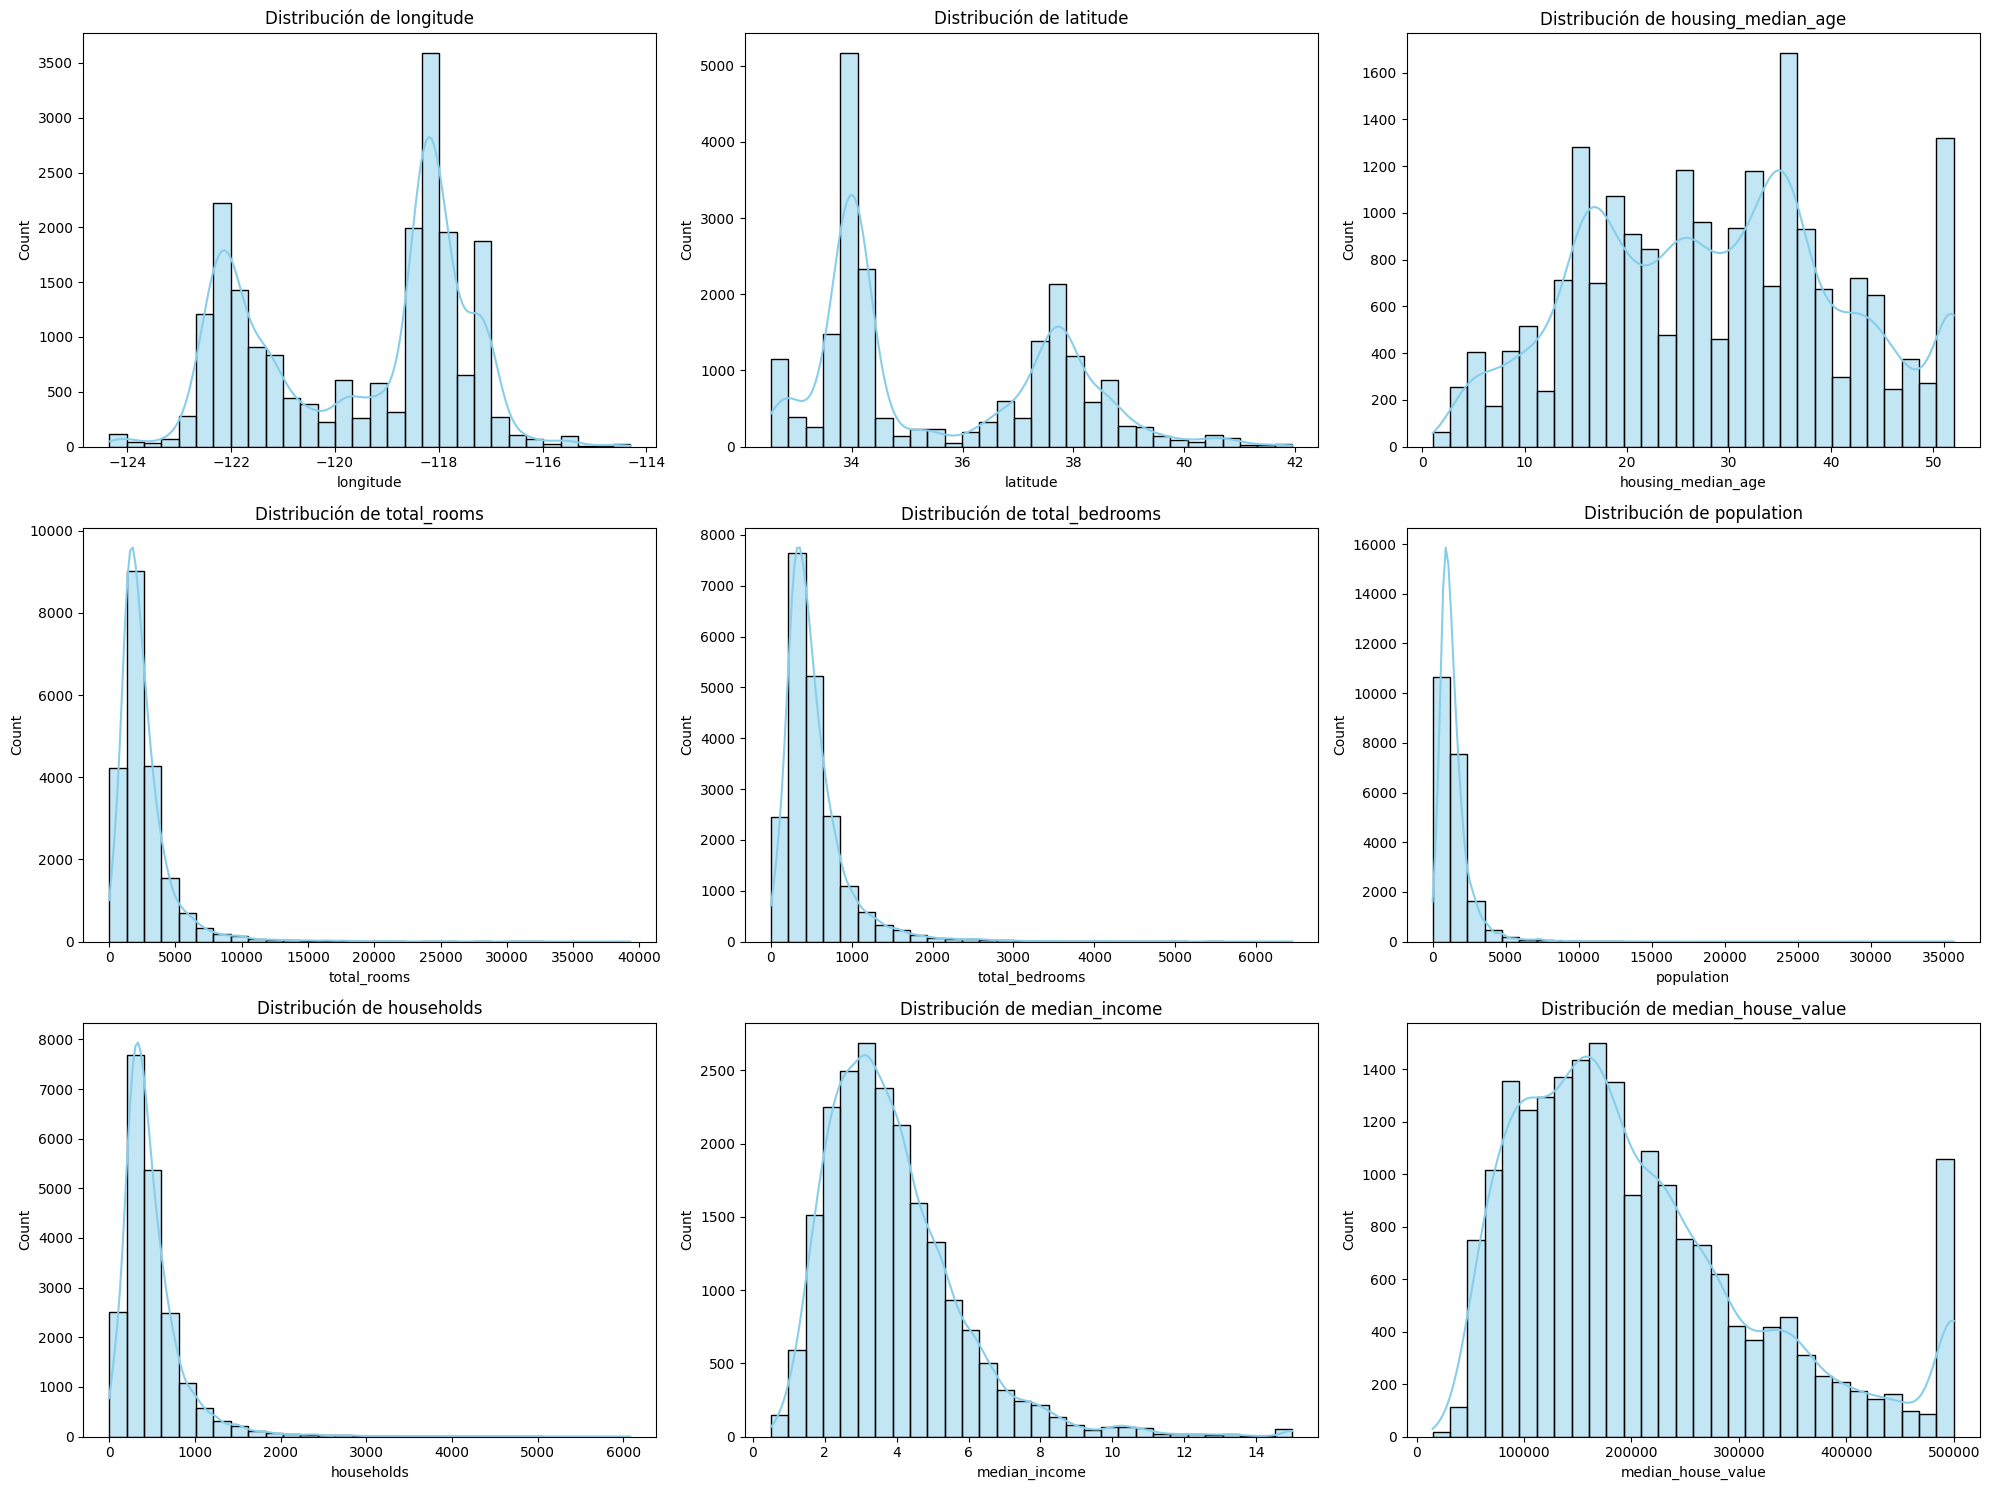

In [47]:
# Seleccionamos solo las columnas numéricas para evitar errores con 'ocean_proximity'
cols_numericas = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))

# Iteramos sobre cada columna numérica
for i, col in enumerate(cols_numericas):
    plt.subplot(3, 3, i + 1)  # Creamos una cuadrícula de 3x3
    sns.histplot(df[col], kde=True, color="skyblue", bins=30) # kde=True agrega la curva
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.show()

## **7. Empleando el siguiente código realiza el gráfico boxplot**

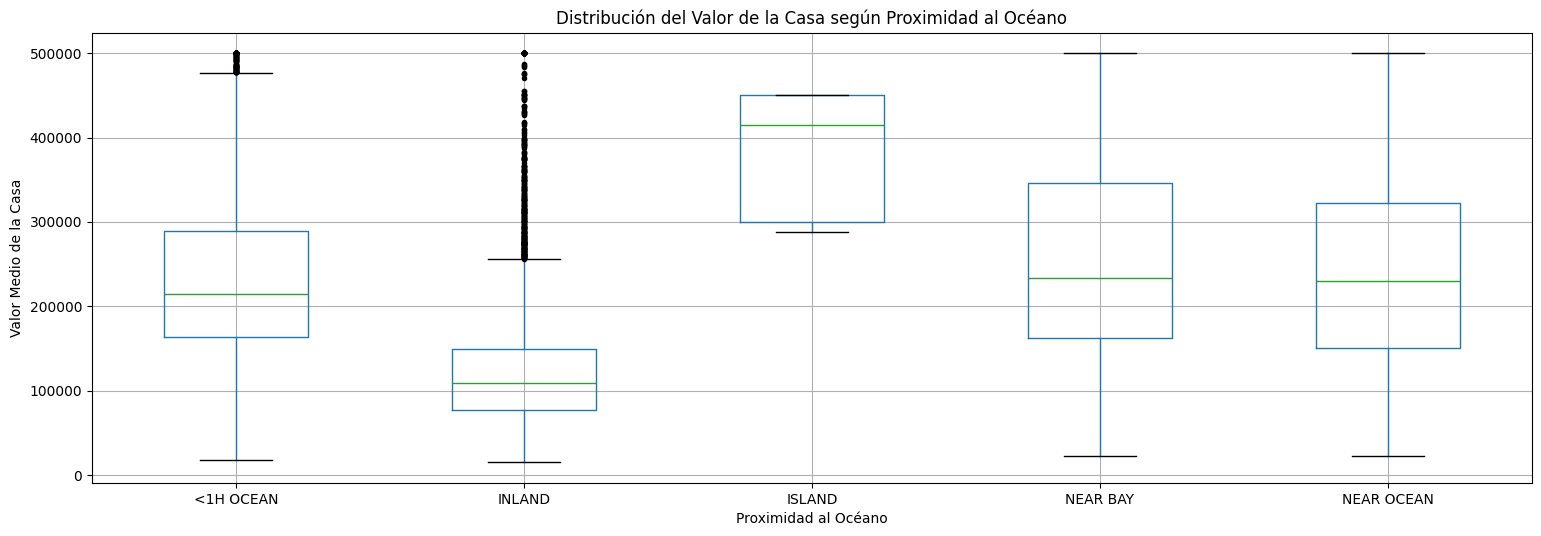

In [48]:
# Realizamos el diagrama de caja agrupando por la columna 'ocean_proximity'
df.boxplot(column="median_house_value", by='ocean_proximity', sym='k.', figsize=(18,6))

plt.title('Distribución del Valor de la Casa según Proximidad al Océano')
plt.suptitle('')
plt.ylabel('Valor Medio de la Casa')
plt.xlabel('Proximidad al Océano')
plt.show()

## **8. Determina la matrix de correlación.**

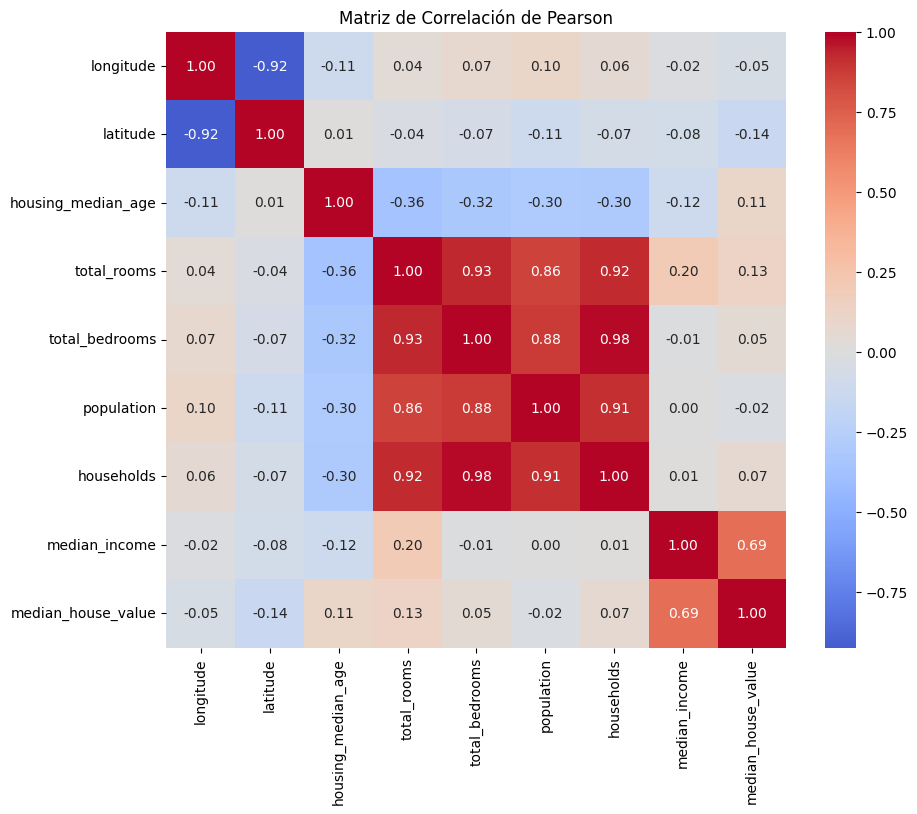

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [49]:
# Calculamos la matriz de correlación (solo con columnas numéricas)
corr_matrix = df.corr(numeric_only=True)

# Visualizamos la matriz usando un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Matriz de Correlación de Pearson")
plt.show()

# Valores numéricos específicos correlacionados con el valor de la casa
print(corr_matrix["median_house_value"].sort_values(ascending=False))

## **9. con las columnas, realiza un grafico pairplot empleando seaborn de python.**

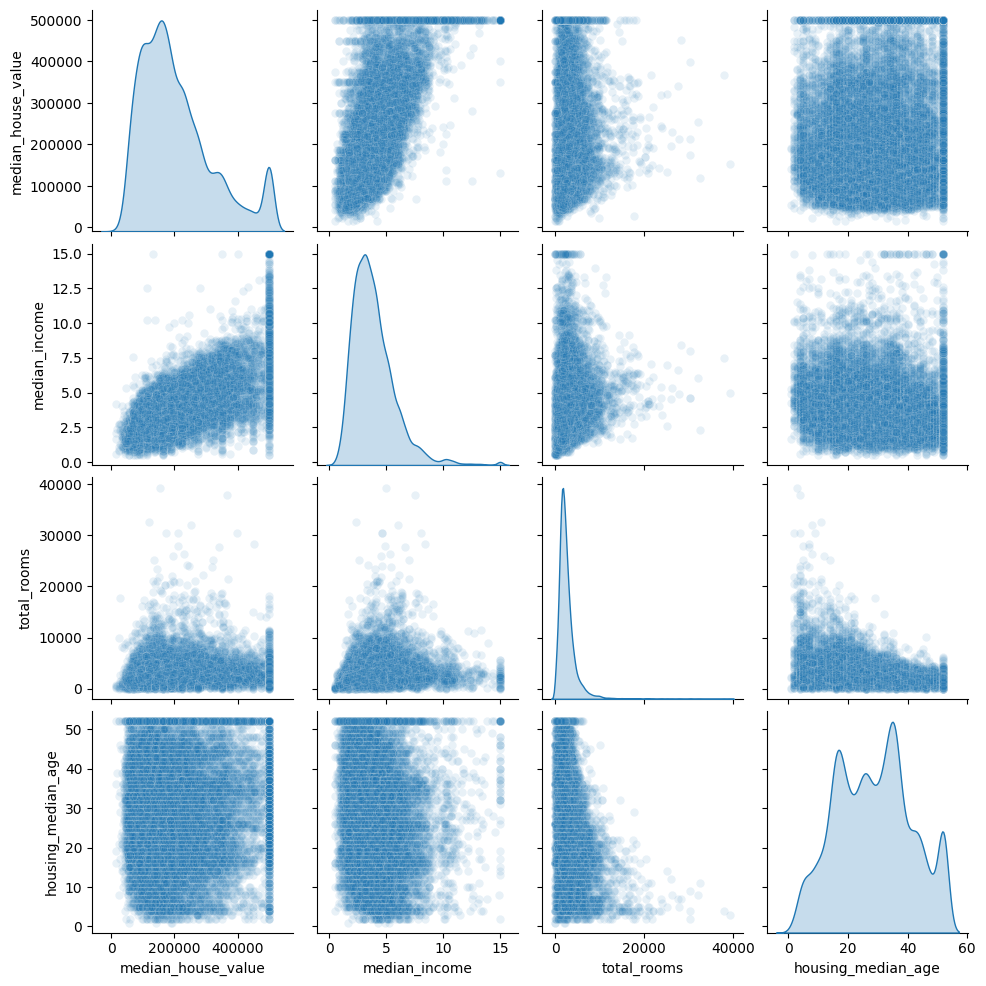

In [50]:
# Definimos las columnas de interés
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# Pairplot
sns.pairplot(df[cols], diag_kind="kde", plot_kws={"alpha": 0.1})
plt.show()

## **10. Realiza un scatter plot con la libreria seaborn de python, el color del grafico puede ser empleado con la columna median_house_value.**

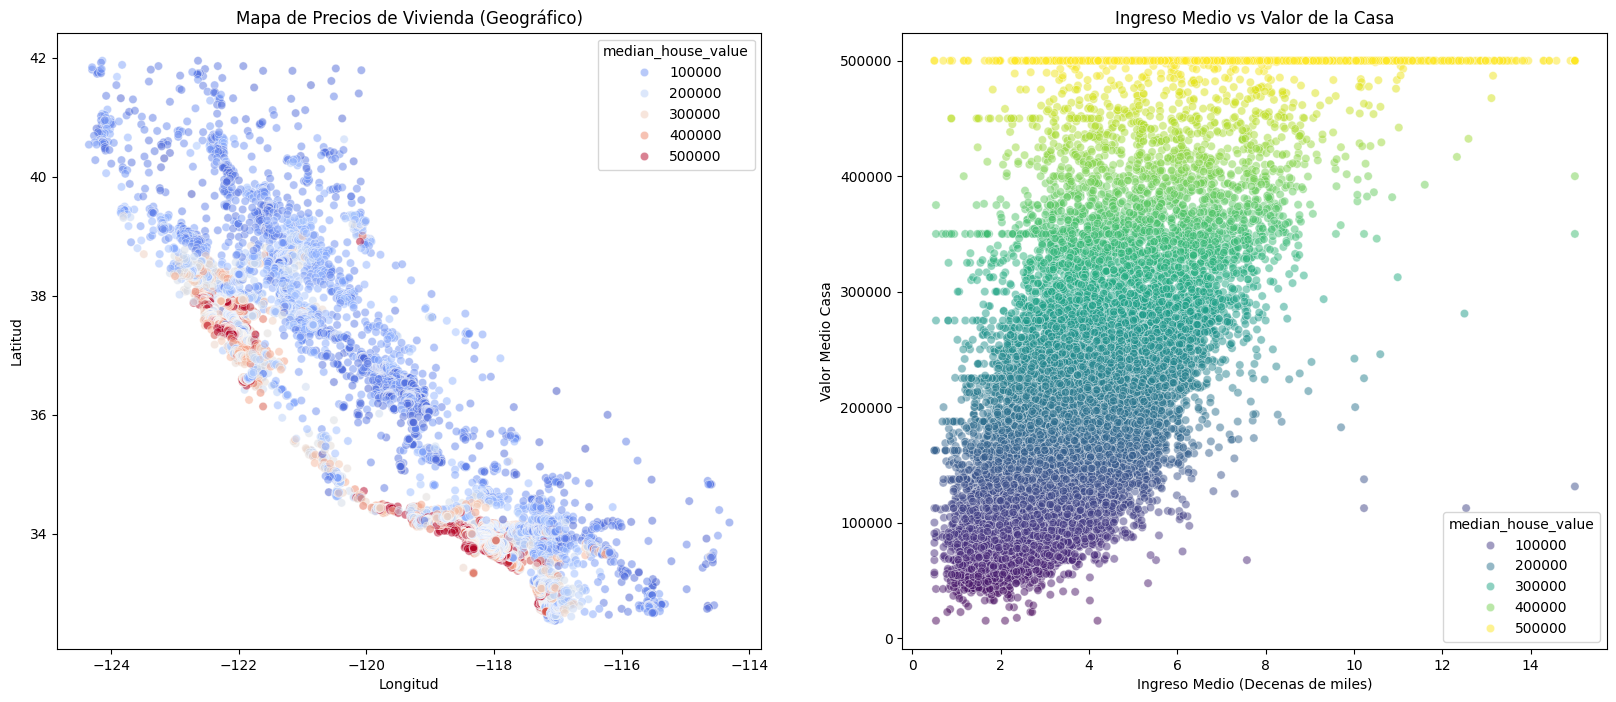

In [51]:
plt.figure(figsize=(20, 8))

# Gráfico 1: Mapa Geográfico (Latitud vs Longitud)
# Rojo para caro y azul para barato
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value',
                palette='coolwarm', alpha=0.5)
plt.title('Mapa de Precios de Vivienda (Geográfico)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Gráfico 2: Relación Ingreso vs Precio (Económico)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='median_house_value',
                palette='viridis', alpha=0.5)
plt.title('Ingreso Medio vs Valor de la Casa')
plt.xlabel('Ingreso Medio (Decenas de miles)')
plt.ylabel('Valor Medio Casa')

plt.show()

## **11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?**

In [52]:
from sklearn.model_selection import train_test_split

# Realizamos una división aleatoria simple (Muestreo Aleatorio)
# test_size=0.2 significa que el 20% de los datos van para test
# random_state=42 fija la "semilla" del generador aleatorio para que el resultado sea siempre el mismo
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(f"Entrenamiento: {len(train_set)} datos")
print(f"Test: {len(test_set)} datos")

Entrenamiento: 16512 datos
Test: 4128 datos


No es adecuada. Una división aleatoria simple en un dataset mediano introduce Sesgo de Muestreo. Si el conjunto de prueba no tiene la misma proporción de ingresos que el original (ej. faltan zonas ricas), la evaluación del modelo será errónea. Se necesita un muestreo estratificado.

## **12. División del dataset en grupos: La siguiente división puede ser realizada basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. [...] Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset. [...] un comparativo general puede ser estructurado de la siguente forma, analiza los errores:**

             Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039826    0.039971  0.040213      0.973236       0.364964
2           0.318847    0.318798  0.324370      1.732260      -0.015195
3           0.350581    0.350533  0.358527      2.266446      -0.013820
4           0.176308    0.176357  0.167393     -5.056334       0.027480
5           0.114438    0.114341  0.109496     -4.318374      -0.084674


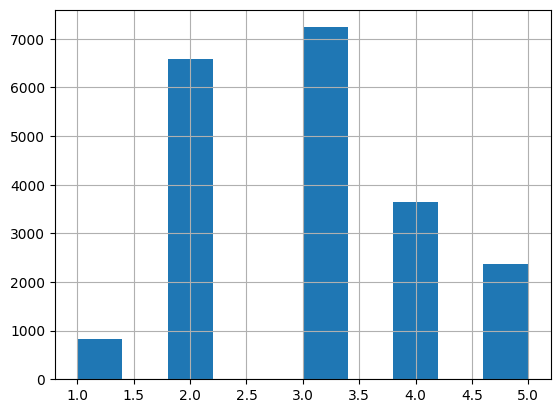

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# 1. Crear la variable categórica 'income_cat' para los estratos
# Se crean 5 categorías basadas en el ingreso medio
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Visualizamos cómo quedaron distribuidas las categorías
df["income_cat"].hist()

# 2. Realizar el Muestreo Estratificado (Stratified Split)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# 3. Realizar Muestreo Aleatorio (para comparar)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# 4. Función para calcular proporciones
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# 5. DataFrame comparativo de errores
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

# Calcular el porcentaje de error de cada método
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

print(compare_props)

# 6. Limpieza: Eliminamos la variable 'income_cat' para que los datos vuelvan a su estado original
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

El método de Muestreo Aleatorio (Random) introdujo un sesgo significativo. La columna Rand. %error, muestra desviaciones (errores) que pueden llegar al 1% o 2% en algunas categorías. Esto significa que, por puro azar, el set de prueba quedó "descalibrado" respecto a la realidad.
En cambio, el Muestreo Estratificado (Stratified) redujo el error prácticamente a cero (Columna Strat. %error).

## **13. Puedes agregar nuevas variables al dataframe para el análisis**

In [54]:
# Trabajamos sobre una copia del set de entrenamiento estratificado
df_train = strat_train_set.copy()

# Creamos las nuevas variables
df_train["rooms_per_household"] = df_train["total_rooms"] / df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"] / df_train["total_rooms"]
df_train["population_per_household"] = df_train["population"] / df_train["households"]

print(df_train[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].head())

       rooms_per_household  bedrooms_per_room  population_per_household
12655             5.485836           0.205784                  3.168555
15502             6.927083           0.160714                  2.623698
2908              5.393333           0.191595                  2.223333
14053             3.886128           0.276505                  1.859213
20496             6.096552           0.182692                  3.167241


## **14. Compara las siguientes variables**

In [55]:
from sklearn.impute import SimpleImputer

# 1. PREPARACIÓN: Separamos las columnas numéricas
# El imputer no funciona con texto ("ocean_proximity"), así que creamos un subconjunto solo numérico
df_train_num = df_train.select_dtypes(include=[np.number])

# 2. DEFINICIÓN DEL IMPUTER
# Usamos strategy='median' porque es más robusta a valores atípicos (outliers) que el promedio ('mean')
imputer = SimpleImputer(strategy="median")

# 3. ENTRENAMIENTO (FIT)
# El imputer calcula la mediana de cada columna y la guarda internamente
imputer.fit(df_train_num)

# --- PUNTO 14: COMPARACIÓN ---
print("Medianas calculadas por el Imputer:")
print(imputer.statistics_)

print("\nMedianas calculadas manualmente (Pandas):")
print(df_train_num.median().values)

# Verificamos si son iguales
print("\n¿Son iguales? ", (imputer.statistics_ == df_train_num.median().values).all())


# --- CONSTRUCCIÓN DE LA MATRIZ DE CARACTERÍSTICAS ---
# 4. TRANSFORMACIÓN
# Rellenamos los valores faltantes (NaN) usando las medianas calculadas
X = imputer.transform(df_train_num)

# 5. RECONSTRUCCIÓN DEL DATAFRAME
# 'X' es un array de NumPy, así que lo convertimos de nuevo a DataFrame
housing_tr = pd.DataFrame(X, columns=df_train_num.columns, index=df_train_num.index)

# Verificamos que ya no hay nulos
print("\nCantidad de nulos después de limpiar:")
print(housing_tr.isnull().sum().max())

Medianas calculadas por el Imputer:
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  1.79500000e+05  5.23234164e+00  2.03027043e-01  2.81766108e+00]

Medianas calculadas manualmente (Pandas):
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  1.79500000e+05  5.23234164e+00  2.03027043e-01  2.81766108e+00]

¿Son iguales?  True

Cantidad de nulos después de limpiar:
0


In [56]:
# 1. VERIFICAR NULOS
# Vemos cuántos datos faltan por columna
print("Conteo de nulos inicial:")
print(df_train.isnull().sum())

# --- OPCIONES PARA TRATAR NULOS (Manual) ---

# Opción 1: Eliminar las filas que tienen huecos (Perdemos datos)
# df_train.dropna(subset=["total_bedrooms"])

# Opción 2: Eliminar la columna entera (Perdemos una variable importante)
# df_train.drop("total_bedrooms", axis=1)

# Opción 3: Rellenar con la mediana (La mejor opción)
median = df_train["total_bedrooms"].median()
print(f"\nLa mediana calculada es: {median}")

# Creamos una copia 'q' donde rellenamos los nulos (NaN) con la mediana
q = df_train["total_bedrooms"].fillna(median).copy()

# 2. VERIFICACIÓN FINAL
# Convertimos a DataFrame para visualizar y verificar que ya no hay nulos
q = pd.DataFrame(q, columns=["total_bedrooms"])
print("\nConteo de nulos después de rellenar manualmente:")
print(q.isnull().sum())

Conteo de nulos inicial:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

La mediana calculada es: 433.0

Conteo de nulos después de rellenar manualmente:
total_bedrooms    0
dtype: int64


## **15. ¿Qué realizan las siguientes lineas de código?**

In [57]:
from sklearn.preprocessing import OneHotEncoder

# 1. Exploración: Vemos las categorías únicas
print("Categorías encontradas:", df_train["ocean_proximity"].unique())

# 2. Selección: Aislamos la columna categórica
housing_cat = df_train[["ocean_proximity"]]

# 3. Codificación (One-Hot Encoding)
# sparse_output=False hace que nos devuelva un array de numpy normal (matriz densa)
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# 4. Verificación de categorías aprendidas
print("\nCategorías en el encoder:", cat_encoder.categories_)

# 5. Convertir a DataFrame
# Importante: Usamos el mismo índice que 'housing_tr' para que las filas no se desordenen
df_cat_1hot = pd.DataFrame(housing_cat_1hot,
                           columns=cat_encoder.categories_[0],
                           index=housing_tr.index)

# 6. Unión final (Join)
# Unimos la parte numérica limpia (housing_tr) con la parte categórica codificada (df_cat_1hot)
housing_tr_ = housing_tr.join(df_cat_1hot)

# Mostramos el resultado final preparado
housing_tr_.head()

Categorías encontradas: ['INLAND' 'NEAR OCEAN' '<1H OCEAN' 'NEAR BAY' 'ISLAND']

Categorías en el encoder: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241,1.0,0.0,0.0,0.0,0.0


## **16. Las variables pueden ser escaladas como sigue:**

In [58]:
from sklearn.preprocessing import MinMaxScaler

# 1. Definimos los datos a escalar
# Usamos 'housing_tr_' que ya tiene: numéricas imputadas + nuevas variables + categorías one-hot
housing_scale = housing_tr_

# 2. Inicializamos el Escalador
# MinMaxScaler ajusta todos los datos para que estén entre 0 y 1
scaler = MinMaxScaler()

# 3. Ajustamos y Transformamos (Fit & Transform)
scaler.fit(housing_scale)
X = scaler.transform(housing_scale)

# 4. Reconstruimos el DataFrame final
# 'X' es una matriz de números, le devolvemos sus nombres de columnas e índice
housing_prepared = pd.DataFrame(X, columns=housing_scale.columns, index=housing_scale.index)

# Verificamos que todo esté entre 0 y 1
print("Máximos por columna (debe ser 1.0):")
print(housing_prepared.max().head())
print("\nMínimos por columna (debe ser 0.0):")
print(housing_prepared.min().head())

housing_prepared.head()

Máximos por columna (debe ser 1.0):
longitude             1.0
latitude              1.0
housing_median_age    1.0
total_rooms           1.0
total_bedrooms        1.0
dtype: float64

Mínimos por columna (debe ser 0.0):
longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.117734,0.030938,0.117537,0.001993,0.0,1.0,0.0,0.0,0.0
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.545567,0.041176,0.067460,0.001554,0.0,0.0,0.0,0.0,1.0
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.139589,0.030281,0.101772,0.001232,0.0,1.0,0.0,0.0,0.0
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.201032,0.019575,0.196117,0.000939,0.0,0.0,0.0,0.0,1.0
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.460413,0.035276,0.091880,0.001992,1.0,0.0,0.0,0.0,0.0


## **17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.**

In [59]:
# --- PASO 1: RECUPERAR DATOS ESTRATIFICADOS (Del punto 12) ---
# Separamos las características (X) de las etiquetas (y)
# Train
X_train_raw = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()
# Test
X_test_raw = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# --- PASO 2: DEFINIR INGENIERÍA DE VARIABLES ---
def agregar_variables(df):
    df_out = df.copy()
    df_out["rooms_per_household"] = df_out["total_rooms"] / df_out["households"]
    df_out["bedrooms_per_room"] = df_out["total_bedrooms"] / df_out["total_rooms"]
    df_out["population_per_household"] = df_out["population"] / df_out["households"]
    return df_out

# Aplicamos ingeniería
X_train_eng = agregar_variables(X_train_raw)
X_test_eng = agregar_variables(X_test_raw)

# Separamos columnas numéricas y categóricas
cat_cols = ["ocean_proximity"]
num_cols = X_train_eng.columns.drop(cat_cols)

# --- PASO 3: LIMPIEZA (IMPUTER) ---
imputer = SimpleImputer(strategy="median")
# ¡OJO! Fit solo en TRAIN
imputer.fit(X_train_eng[num_cols])

# Transformamos ambos
X_train_num = pd.DataFrame(imputer.transform(X_train_eng[num_cols]), columns=num_cols, index=X_train_eng.index)
X_test_num = pd.DataFrame(imputer.transform(X_test_eng[num_cols]), columns=num_cols, index=X_test_eng.index)

# --- PASO 4: CODIFICACIÓN (CATEGÓRICA) ---
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# ¡OJO! Fit solo en TRAIN
encoder.fit(X_train_eng[cat_cols])

# Transformamos ambos
feat_names = encoder.get_feature_names_out(cat_cols)
X_train_cat = pd.DataFrame(encoder.transform(X_train_eng[cat_cols]), columns=feat_names, index=X_train_eng.index)
X_test_cat = pd.DataFrame(encoder.transform(X_test_eng[cat_cols]), columns=feat_names, index=X_test_eng.index)

# Unimos numérico y categórico
X_train_joined = X_train_num.join(X_train_cat)
X_test_joined = X_test_num.join(X_test_cat)

# --- PASO 5: ESCALAMIENTO (MINMAX) ---
scaler = MinMaxScaler()
# ¡OJO! Fit solo en TRAIN
scaler.fit(X_train_joined)

# Transformamos y reconstruimos DataFrames finales
X_train_final = pd.DataFrame(scaler.transform(X_train_joined), columns=X_train_joined.columns, index=X_train_joined.index)
X_test_final = pd.DataFrame(scaler.transform(X_test_joined), columns=X_test_joined.columns, index=X_test_joined.index)

# --- PASO 6: GENERAR DATAFRAMES FINALES (CON ETIQUETAS) ---
# El enunciado pide que tengan las características Y los datos etiquetados
housing_train_listo = X_train_final.join(y_train)
housing_test_listo = X_test_final.join(y_test)

print(f"Train Shape: {housing_train_listo.shape}")
print(f"Test Shape: {housing_test_listo.shape}")
housing_train_listo.head()

Train Shape: (16512, 17)
Test Shape: (4128, 17)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.030938,0.117537,0.001993,0.0,1.0,0.0,0.0,0.0,72100.0
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.041176,0.067460,0.001554,0.0,0.0,0.0,0.0,1.0,279600.0
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.030281,0.101772,0.001232,0.0,1.0,0.0,0.0,0.0,82700.0
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.019575,0.196117,0.000939,0.0,0.0,0.0,0.0,1.0,112500.0
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.035276,0.091880,0.001992,1.0,0.0,0.0,0.0,0.0,238300.0


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- A. ENTRENAMIENTO DEL MODELO (Regresión Lineal) ---
lin_reg = LinearRegression()
# Entrenamos con los datos procesados en el punto 17
lin_reg.fit(X_train_final, y_train)

# --- B. EVALUACIÓN ---
# Hacemos predicciones sobre el mismo set de entrenamiento para ver el error
housing_predictions = lin_reg.predict(X_train_final)

# Calculamos el error cuadrático medio (RMSE)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

# Calculamos el Score (R2)
r2 = r2_score(y_train, housing_predictions)

print("--- RESULTADOS REGRESIÓN LINEAL ---")
print(f"Error Promedio (RMSE): ${lin_rmse:.2f}")
print(f"Score (R2): {r2:.4f}") # 1.0 es perfecto, 0.0 es pésimo

# --- C. AUTOMATIZACIÓN CON PIPELINES (Respuesta a pregunta 5) ---
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Definimos los pasos numéricos: Imputar -> Escalar
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', MinMaxScaler())
])

# Definimos los pasos categóricos: OneHot
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# ColumnTransformer aplica cada pipeline a sus columnas correspondientes
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols), # num_cols definidas en el paso anterior
    ("cat", cat_pipeline, cat_cols), # cat_cols = ["ocean_proximity"]
])

# Creamos el Pipeline FINAL que incluye el preprocesamiento Y el modelo
modelo_final = Pipeline([
    ('preparacion', full_pipeline),
    ('regresion', LinearRegression())
])

modelo_final.fit(X_train_eng, y_train) # X_train_eng tiene las vars nuevas pero sin limpiar

--- RESULTADOS REGRESIÓN LINEAL ---
Error Promedio (RMSE): $68160.92
Score (R2): 0.6529


Pipeline(steps=[('preparacion',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('regresion', LinearRegression())])

## **18. ¿que puede concluir respecto al modelo empleado?**
Al analizar los resultados, se concluye que el modelo de Regresión Lineal sufre de subajuste (underfitting). El error cuadrático medio (RMSE) resultante es de aproximadamente 68,000 dólares, lo cual es un margen de error demasiado alto considerando que el valor medio de muchas viviendas oscila entre los 120,000 y 265,000 dólares. Esto indica que el modelo es demasiado simple y no logra capturar la estructura compleja y los patrones subyacentes de los datos inmobiliarios.

## **19. ¿El modelo de regresión lineal es válido para lo construido**
Matemáticamente es válido en el sentido de que el algoritmo converge y entrega un resultado, pero desde el punto de vista del análisis de datos, no es el modelo adecuado. La relación entre las características (especialmente la ubicación geográfica latitud/longitud) y el precio de la vivienda no es puramente lineal. Al intentar ajustar una línea recta (o un hiperplano) a una distribución de datos que presenta curvaturas y complejidades no lineales, el modelo pierde capacidad predictiva, por lo que su validez práctica es limitada.

## **20. ¿Qué información nos da el score?**
El score calculado (Coeficiente de Determinación o $R^2$) nos indica la proporción de la varianza de la variable objetivo (precio de la casa) que es predecible a partir de las variables independientes. Al obtener un valor cercano a 0.64, significa que nuestro modelo solo es capaz de explicar el 64% del comportamiento de los precios. El 36% restante se debe a factores o relaciones complejas que el modelo lineal está ignorando por completo.

## **21. ¿Puede ser ajustado a otro modelo?**
 Sí, y es el paso necesario para mejorar el rendimiento. Dado que hemos confirmado el subajuste, se debe proceder a probar modelos no lineales más potentes. Las opciones recomendadas serían el DecisionTreeRegressor (Árboles de Decisión), que puede capturar relaciones no lineales complejas, o idealmente un RandomForestRegressor (Bosques Aleatorios), que al promediar múltiples árboles reduce la varianza y suele ofrecer resultados muy superiores en este tipo de conjuntos de datos tabulares.

## **22. ¿Cómo puede automatizar todo el proceso empleando pipelines?**
 El proceso se puede automatizar encapsulando secuencialmente todas las transformaciones y el estimador final en un solo objeto Pipeline de Scikit-Learn. Esto implica definir pasos ordenados donde primero se ejecutan las transformaciones (como el SimpleImputer para rellenar nulos, seguido del MinMaxScaler para escalar numéricos y el OneHotEncoder para categorías) y finalmente se conecta con el modelo de predicción. Esto garantiza que al ingresar datos crudos (nuevos), estos pasen automáticamente por el mismo preprocesamiento que los datos de entrenamiento, evitando errores humanos y fugas de información.